In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import random

import matplotlib

plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize':16,
    'axes.labelsize':16,
    'axes.xmargin':0.1,
    'axes.ymargin':0.1,
    'legend.fontsize':16,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'lines.markersize': 10,
    'lines.linewidth' : 3,
    'font.size': 16
})

plt.rcParams["figure.figsize"] = (18,9)




In [2]:
#Import Data
raw_data=pd.read_csv("../data/processed/gathered.csv",index_col=False )

# Add column to identify available time series (i.e walks where as WalkId=SubjectIdRunId) 
subject_id=raw_data['SubjectId'].values
run_id=raw_data['RunId'].values
walk = [str(int(i)) + '-' + str(int(j)) for i, j in zip(subject_id, run_id)]
raw_data['walk']=walk

In [3]:
# Extract individual walks
walks=list(raw_data.drop_duplicates(subset=['walk'])['walk'].values)
print('No. of available walks (time series) in the dataset is {} performed by {} subjects'.format(len(walks),len(set(subject_id))))

No. of available walks (time series) in the dataset is 46 performed by 24 subjects


# Identify time discontinuity in walks

In [4]:
lags=[]
for walk in walks:
    walk_data=raw_data[raw_data['walk']==walk]
    stamps=walk_data['stamp'].values
    diff=np.diff(stamps)
    time_lag=np.where(diff<0.015,0,diff )
    lag_idx=np.nonzero(time_lag)
    lags.append(lag_idx)
    if time_lag.sum()>0:
        print('{} discontinuity detected in walk: {} at indices: {} with lags {} sec'.format(len(lag_idx),walk, list(lag_idx[0]), list(time_lag[lag_idx[0]])))
    


1 discontinuity detected in walk: 52-2 at indices: [46399] with lags [7.009999990463257] sec
1 discontinuity detected in walk: 78-1 at indices: [41599] with lags [1.0099999904632568] sec
1 discontinuity detected in walk: 78-2 at indices: [13699] with lags [2.009999990463257] sec
1 discontinuity detected in walk: 145-1 at indices: [57699] with lags [51.00999999046326] sec
1 discontinuity detected in walk: 161-3 at indices: [21199] with lags [12.009999990463257] sec
1 discontinuity detected in walk: 181-2 at indices: [55699] with lags [1.0099999904632568] sec
1 discontinuity detected in walk: 290-1 at indices: [49699] with lags [9.009999990463257] sec
1 discontinuity detected in walk: 314-1 at indices: [39499] with lags [1.0099999904632568] sec
1 discontinuity detected in walk: 314-2 at indices: [32799, 34299] with lags [1.0099999904632568, 15.009999990463257] sec
1 discontinuity detected in walk: 317-1 at indices: [37299] with lags [1.0099999904632568] sec
1 discontinuity detected in wa

# Plotting randomly selected walks

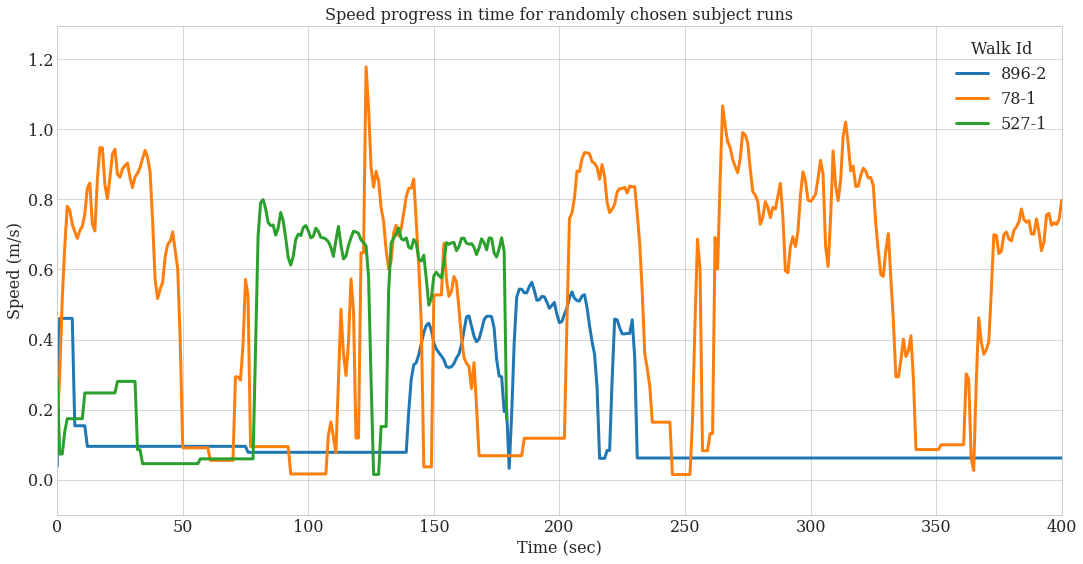

In [5]:
# Plotting random selected walks
speed=[]
random.seed(10)
selected_walks=random.sample(walks,3)
for walk in selected_walks:
    walk_data=raw_data[raw_data['walk']==walk]
    walk_speed=walk_data['speed'].values
    walk_speed=walk_speed[::100] #downsampled 100Hz to 1Hz
    speed.append(walk_speed)

fig, ax=plt.subplots(nrows=1,ncols=1)
ax.set_xlim([0,400])
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Speed (m/s)')
for walk_name,walk_speed in zip(selected_walks,speed):
    ax.plot(walk_speed, label=walk_name)
ax.legend(title="Walk Id", fancybox=True) #WalkId=SubjectId-RunId
ax.set_title('Speed progress in time for randomly chosen subject runs')  
plt.savefig("../reports/figures/walk_vs_time.png") 

# Visualize acceleration Distribution in SPACE for four distinct speeds

In [ ]:
# Extract available speeds
speeds=raw_data.drop_duplicates(subset=['speed'])
speeds=list(speeds['speed'].values)

In [ ]:
# Extract accelration data corresponding to each speed 
accls=[]
for speed in speeds:
    accls_per_speed=raw_data[raw_data['speed']==speed]
    accls_per_speed=accls_per_speed.drop(['stamp','SubjectId','RunId'], axis=1).values
    accls.append(accls_per_speed)




# Visualize acceleration Distribution in TIME  for four distinct speeds